In [ ]:
!pip install evaluate
!pip install transformers
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 1.1 MB/s 
     |████████████████████████████████| 182 kB 10.1 MB/s 
     |████████████████████████████████| 212 kB 60.6 MB/s 
     |████████████████████████████████| 451 kB 50.1 MB/s 
     |████████████████████████████████| 132 kB 50.6 MB/s 
     |████████████████████████████████| 127 kB 52.2 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 5.1 MB/s 
     |████████████████████████████████| 7.6 MB 36.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import re 
from tqdm import tqdm
import numpy as np
from nltk import tokenize
import nltk
import string
from keras.preprocessing.text import Tokenizer
import torch
import json

For all the 


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### Reading data 

In [ ]:
plato_full = open('/content/plato.txt',encoding="utf8").read()
shake_full = open('/content/shakespeare.txt',encoding="utf8").read()
print('Plato Length', len(plato_full), '\nShakespear Length', len(shake_full))

Plato Length 1427843 
Shakespear Length 5535477


In [ ]:
plato_sent = tokenize.sent_tokenize(plato_full)
shake_sent = tokenize.sent_tokenize(shake_full)

In [ ]:
plato_sent[:2], shake_sent[:2]

(['\ufeffThe Project Gutenberg EBook of The Republic of Plato, by Plato\n\nThis eBook is for the use of anyone anywhere in the United States and most\nother parts of the world at no cost and with almost no restrictions\nwhatsoever.',
  'You may copy it, give it away or re-use it under the terms of\nthe Project Gutenberg License included with this eBook or online at\nwww.gutenberg.org.'],
 ['\ufeffThe Project Gutenberg eBook of The Complete Works of William Shakespeare, by William Shakespeare\n\nThis eBook is for the use of anyone anywhere in the United States and\nmost other parts of the world at no cost and with almost no restrictions\nwhatsoever.',
  'You may copy it, give it away or re-use it under the terms\nof the Project Gutenberg License included with this eBook or online at\nwww.gutenberg.org.'])

In [ ]:
def clean_data(sentences):
  sent_clean = []
  translator = str.maketrans(string.punctuation, ' '*len(string.punctuation)) 

  for data in sentences:
    data = data.replace('\n', ' ').replace('\r', ' ').replace('\ufeff', ' ')
    data = data.translate(translator)
    sent_clean.append(data.lower())
  return sent_clean

In [ ]:
plato_sent_clean = clean_data(plato_sent)
shake_sent_clean = clean_data(shake_sent)

In [ ]:
plato_sent_clean[:2], shake_sent_clean[:2]

([' the project gutenberg ebook of the republic of plato  by plato  this ebook is for the use of anyone anywhere in the united states and most other parts of the world at no cost and with almost no restrictions whatsoever ',
  'you may copy it  give it away or re use it under the terms of the project gutenberg license included with this ebook or online at www gutenberg org '],
 [' the project gutenberg ebook of the complete works of william shakespeare  by william shakespeare  this ebook is for the use of anyone anywhere in the united states and most other parts of the world at no cost and with almost no restrictions whatsoever ',
  'you may copy it  give it away or re use it under the terms of the project gutenberg license included with this ebook or online at www gutenberg org '])

### Dividing the sentences in train and test data and saving it in file

In [ ]:
l = []
plato_sent_new = []
for sent in plato_sent_clean:
  sent_len = len(sent.split())
  if sent_len > 5 and sent_len < 100:
    l.append(sent_len)
    plato_sent_new.append(' '.join(sent.split()))

In [ ]:
np.max(l), np.min(l), np.mean(l), plato_sent_new[np.argmin(l)], plato_sent_new[np.argmax(l)], len(plato_sent_new)

(99,
 6,
 24.97346547314578,
 'the introduction to the phaedrus vol',
 'and while weaker or coarser characters will extract good out of evil say in a corrupt state of the church or of society and live on happily allowing the evil to remain the finer or stronger natures may be crushed or spoiled by surrounding influences may become misanthrope and philanthrope by turns or in a few instances like the founders of the monastic orders or the reformers owing to some peculiarity in themselves or in their age may break away entirely from the world and from the church sometimes into great good sometimes into great evil sometimes into both',
 9384)

In [ ]:
l = []
shake_sent_new = []
for sent in shake_sent_clean:
  sent_len = len(sent.split())
  if sent_len > 5 and sent_len < 100:
    l.append(sent_len)
    shake_sent_new.append(' '.join(sent.split()))

In [ ]:
np.max(l), np.min(l), np.mean(l), shake_sent_new[np.argmin(l)], shake_sent_new[np.argmax(l)], len(shake_sent_new)

(99,
 6,
 17.631979166666667,
 'a room in the countess’s palace',
 'for do but note a wild and wanton herd or race of youthful and unhandled colts fetching mad bounds bellowing and neighing loud which is the hot condition of their blood if they but hear perchance a trumpet sound or any air of music touch their ears you shall perceive them make a mutual stand their savage eyes turn’d to a modest gaze by the sweet power of music therefore the poet did feign that orpheus drew trees stones and floods since naught so stockish hard and full of rage but music for the time doth change his nature',
 48000)

In [ ]:
shake_sent_temp = shake_sent_new
plato_sent_temp = plato_sent_new

In [ ]:
plato_train_sent = plato_sent_temp[0:int(0.8*len(plato_sent_temp))]
plato_test_sent = plato_sent_temp[int(0.8*len(plato_sent_temp)):]
shake_train_sent = shake_sent_temp[0:int(0.8*len(shake_sent_temp))]
shake_test_sent = shake_sent_temp[int(0.8*len(shake_sent_temp)):]

In [ ]:
plato_train_sent='\n'.join(plato_train_sent)
plato_test_sent='\n'.join(plato_test_sent)
shake_train_sent='\n'.join(shake_train_sent)
shake_test_sent='\n'.join(shake_test_sent)

In [ ]:
import pickle
with open("plato_train_full.txt", "w") as fp:   #Pickling
    fp.write(plato_train_sent)
with open("plato_test_full.txt", "w") as fp:   #Pickling
    fp.write(plato_test_sent)
with open("shake_train_full.txt", "w") as fp:   #Pickling
    fp.write(shake_train_sent)
with open("shake_test_full.txt", "w") as fp:   #Pickling
    fp.write(shake_test_sent)

###Stacked LSTM

In [ ]:
# Uncomment below block to generate the n_gram files for training and testing
# prepare data

plato_train_ngram = open('/content/plato_train_full.txt', 'r').read()
plato_test_ngram = open('/content/plato_test_full.txt', 'r').read()

In [ ]:
# Uncomment below block to generate the n_gram files for training and testing
# prepare data

shake_train_ngram = open('/content/shake_train_full.txt', 'r').read()
shake_test_ngram = open('/content/shake_test_full.txt', 'r').read()

In [ ]:
plato_train_ngram = ['<s> '+line+ ' </s>'for line in plato_train_ngram.split('\n')]
plato_test_ngram = ['<s> '+line+ ' </s>'for line in plato_test_ngram.split('\n')]
with open("plato_train_ngram.txt", "w") as fp:   #Pickling
    fp.write('\n'.join(plato_train_ngram))
with open("plato_test_ngram.txt", "w") as fp:   #Pickling
    fp.write('\n'.join(plato_test_ngram))

In [ ]:
shake_train_ngram = ['<s> '+line+ ' </s>'for line in shake_train_ngram.split('\n')]
shake_test_ngram = ['<s> '+line+ ' </s>'for line in shake_test_ngram.split('\n')]
with open("shake_train_ngram.txt", "w") as fp:   #Pickling
    fp.write('\n'.join(shake_train_ngram))
with open("shake_test_ngram.txt", "w") as fp:   #Pickling
    fp.write('\n'.join(shake_test_ngram))

In [ ]:
def generate_ngrams(length,filename):
    training_file_path = str (filename)

    # Gather contents from the file
    f = open(training_file_path, "r")
    files = f.read()
    temp_var = files.split('\n')[:5000]
    files = ' '.join(temp_var)
    f.close()
    tokens = files.split()

    # storing frequency of unique tokens in the tokens
    uniq_tokens = {}
    for tok in tokens:
        if tok not in uniq_tokens:
            uniq_tokens[tok] = 1
        else:
            uniq_tokens[tok] += 1

    # replacing words with frequency 1 with <UNK>
    tokens_unk = tokens.copy()
    for i in uniq_tokens:
        if uniq_tokens[i] == 1:
            for k, j in enumerate(tokens):
                if i == j:
                    tokens_unk[k] = "<UNK>"

    # Creating a list of all possible n-grams from the tokens_unk and storing in ngrams_lst list
    # print('ngram', self.n_gram, 'self tokens', self.tokens_unk[1:])
    # print(self.tokens_unk[0:])
    
    ngrams = zip(*[tokens_unk[i:] for i in range(length)])
    # print('gs', [i for i in ngrams])
    ngrams_lst = [" ".join(ngs) for ngs in ngrams]
    with open('len'+str(length)+'.json', 'w') as fp:
        json.dump(ngrams_lst, fp)
    return ngrams_lst

In [ ]:
# Generate ngrams
# generate_ngrams(2,'plato_train_ngram.txt')
# generate_ngrams(3,'plato_train_ngram.txt')
# generate_ngrams(5,'plato_train_ngram.txt')


In [ ]:
# Generate ngrams
generate_ngrams(2,'shake_train_ngram.txt')
generate_ngrams(3,'shake_train_ngram.txt')
generate_ngrams(5,'shake_train_ngram.txt')

#### Encoding Data and splitting into X and y

In [ ]:
import json
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
import pickle
import numpy as np
def encoding_data(length):
    with open('len'+str(length)+'.json', 'r') as fp:
        seq=json.load( fp)
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(seq)
    
    sequences = tokenizer.texts_to_sequences(seq)
    
    sequences=np.array(sequences)
    vocab=len(tokenizer.word_counts)+1
    data_x=sequences[:,:-1]
    data_y=sequences[:,-1]
    data_y = to_categorical(data_y, num_classes=vocab)
    words_to_index = tokenizer.word_index
    with open('tokenizer1_len'+str(length)+'.pickle', 'wb') as handle:
        pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    del seq
    return data_x,data_y,vocab,words_to_index

In [ ]:
def lstm_model(length,unit1,unit2,n):
    import matplotlib.pyplot as plt
    import tensorflow as tf
    from tensorflow.keras.regularizers import l2
    from tensorflow.keras.layers import LSTM, Activation, Dropout, Dense, Input,Embedding,Bidirectional
    from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,LearningRateScheduler
    from tensorflow.keras.models import Model,Sequential
    from tensorflow.keras.optimizers import Adam
    # Calling the encoding function to get the data of specified length and the vocabulary
    data_x,data_y,v,wti=encoding_data(length) 
    print("Data Encoded")
    print("Data_x",data_x[:5])
    print("Data_y",data_y[:5])
    print("Vocab_Size",v)
   
    # Preparing the model based on the inputs of unit1 ,unit2 and vocab values 
    model = Sequential()
    #model.add(Embedding(input_dim=v, output_dim=300 , input_length=length-1, weights = [embed_matrix], trainable=False))
    model.add(Embedding(v, length-1, input_length=length-1))
    model.add(Bidirectional(LSTM(unit1, return_sequences=True)))
    model.add(LSTM(unit2))
    model.add(Dropout(0.5))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(v, activation='softmax'))
    print(model.summary())
    #print("Perplexity:", tf.exp(model.train_loss))
    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
    filepath="lstm_len"+str(length)+".hdf5"
    checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
    
    
    def scheduler(epoch):
        
        if epoch < 60:
            return 0.001
        elif epoch < 100:
            return 0.0005
        else:
            return 0.0001
    lr = LearningRateScheduler(scheduler)
    callbacks_list = [checkpoint,lr]
    # fit model with epochs 130 
    
    history=model.fit(data_x, data_y,batch_size=8, epochs=n,callbacks=callbacks_list)
    #print('Perplexity:', history.history.keys())
    print('Perplexity:', tf.exp(history.history['loss'][-1]).numpy())
    # perplexity.append(tf.exp(history.history['loss'][-1]))
    del data_x,data_y,v,wti
    
    # Plotting the loss and accuracy achieved by the model in each epoch
    fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(20,10))
    ax[0].plot(history.history['loss'])
    ax[1].plot(history.history['accuracy'])
    ax[0].set_title('model loss')
    ax[1].set_title('model Accuracy')
    ax[0].set_ylabel('loss')
    ax[0].set_xlabel('epoch')
    ax[1].set_ylabel('accuracy')
    ax[1].set_xlabel('epoch')
    fig.tight_layout(pad=10.0)
    plt.show()

Data Encoded
Data_x [[   1]
 [   3]
 [1825]
 [2233]
 [1826]]
Data_y [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Vocab_Size 4208
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1, 1)              4208      
                                                                 
 bidirectional (Bidirectiona  (None, 1, 200)           81600     
 l)                                                              
                                                                 
 lstm_1 (LSTM)               (None, 50)                50200     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 50)     

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
12446/12452 [============================>.] - ETA: 0s - loss: 5.9267 - accuracy: 0.1177
Epoch 1: loss improved from inf to 5.92643, saving model to lstm_len2.hdf5
12452/12452 [==============================] - 104s 8ms/step - loss: 5.9264 - accuracy: 0.1177 - lr: 0.0010
Epoch 2/10
12449/12452 [============================>.] - ETA: 0s - loss: 5.7053 - accuracy: 0.1256
Epoch 2: loss improved from 5.92643 to 5.70529, saving model to lstm_len2.hdf5
12452/12452 [==============================] - 96s 8ms/step - loss: 5.7053 - accuracy: 0.1256 - lr: 0.0010
Epoch 3/10
12446/12452 [============================>.] - ETA: 0s - loss: 5.6547 - accuracy: 0.1267
Epoch 3: loss improved from 5.70529 to 5.65467, saving model to lstm_len2.hdf5
12452/12452 [==============================] - 95s 8ms/step - loss: 5.6547 - accuracy: 0.1267 - lr: 0.0010
Epoch 4/10
12445/12452 [============================>.] - ETA: 0s - loss: 5.6207 - accuracy: 0.1271
Epoch 4: loss improved from 5.65467 to 5.6203

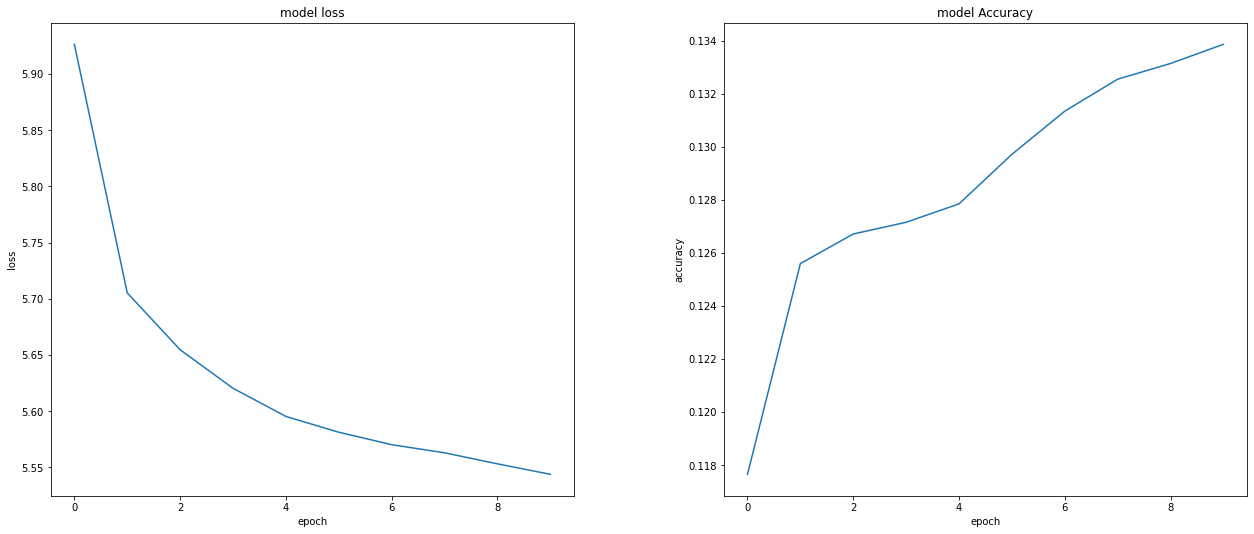

In [ ]:
#Here the history is of length 1(bigram model)
lstm_model(2,100,50,10)
#print(history.history.keys())


Data Encoded
Data_x [[   1    3]
 [   3 1825]
 [1825 2233]
 [2233 1826]
 [1826    7]]
Data_y [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Vocab_Size 4208
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 2, 2)              8416      
                                                                 
 bidirectional_1 (Bidirectio  (None, 2, 200)           82400     
 nal)                                                            
                                                                 
 lstm_3 (LSTM)               (None, 50)                50200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense) 

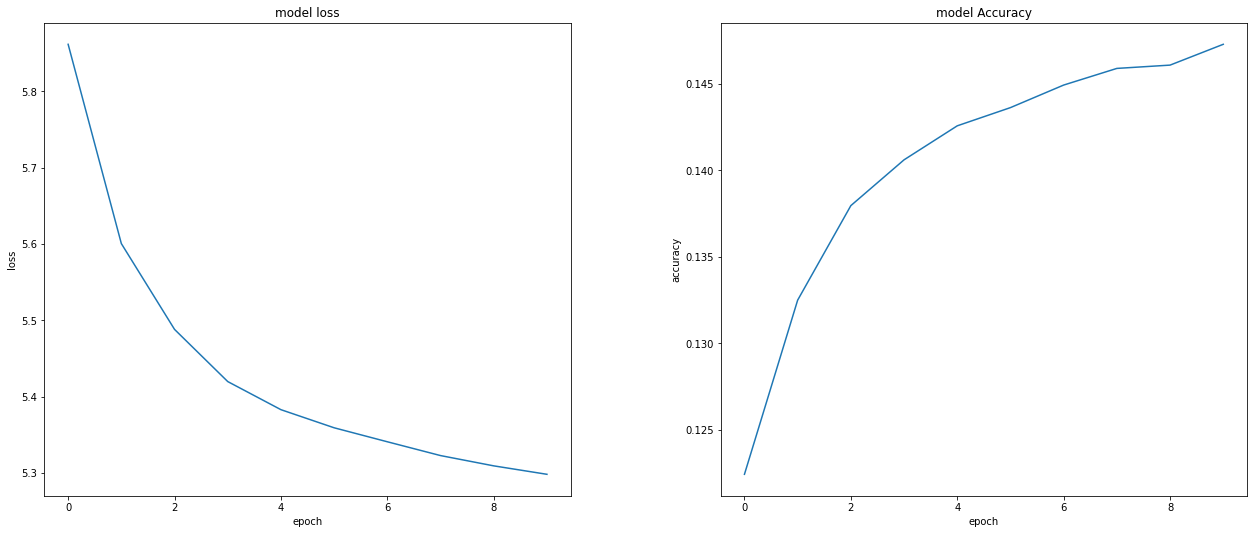

In [ ]:
#Here the history is of length 2(Trigram Model)
lstm_model(3,100,50,10)

Data Encoded
Data_x [[   1    3 2232 2885]
 [   3 2232 2885 1825]
 [2232 2885 1825    7]
 [2885 1825    7    3]
 [1825    7    3    2]]
Data_y [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Vocab_Size 4208
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 4, 4)              16832     
                                                                 
 bidirectional_2 (Bidirectio  (None, 4, 200)           84000     
 nal)                                                            
                                                                 
 lstm_5 (LSTM)               (None, 50)                50200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                 

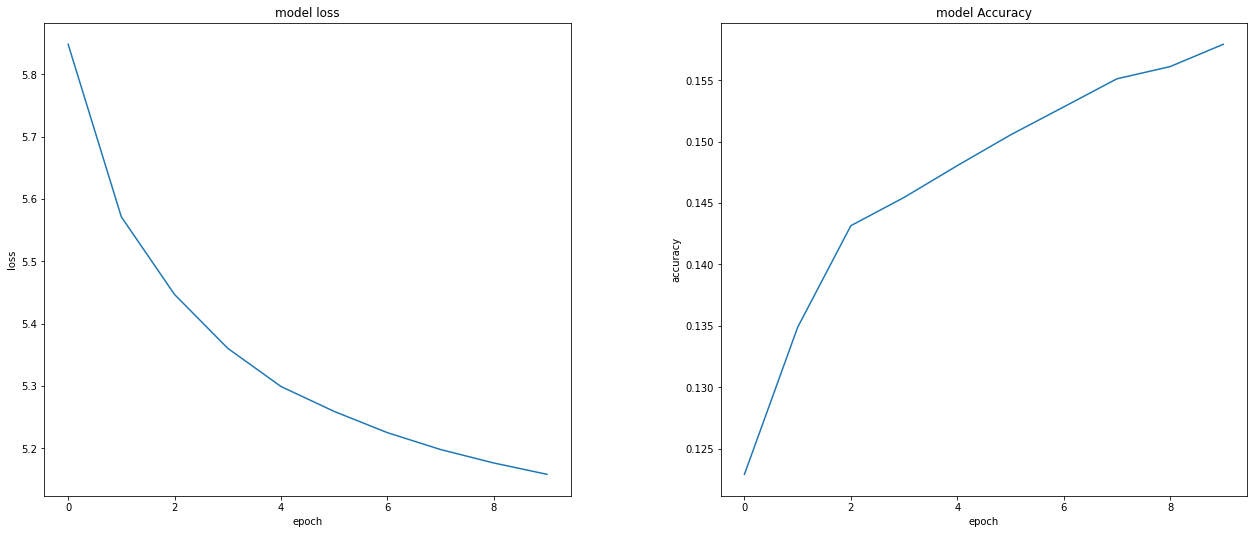

In [ ]:
#Here the history is of length 4(Pentagram Model)
lstm_model(5,100,50,10)

####Test Data Generation

In [ ]:
import json
def generate_test_ngrams(length,filename):
    training_file_path = str (filename)

    # Gather contents from the file
    f = open(training_file_path, "r")
    files = f.read()
    #For shakespeare data to keep uniformity in metrics used temp_var(remove for plato)
    temp_var = files.split('\n')[:2000]
    files = ' '.join(temp_var)
    f.close()
    tokens = files.split()

    # storing frequency of unique tokens in the tokens
    uniq_tokens = {}
    for tok in tokens:
        if tok not in uniq_tokens:
            uniq_tokens[tok] = 1
        else:
            uniq_tokens[tok] += 1

    # replacing words with frequency 1 with <UNK>
    tokens_unk = tokens.copy()
    for i in uniq_tokens:
        if uniq_tokens[i] == 1:
            for k, j in enumerate(tokens):
                if i == j:
                    tokens_unk[k] = "<UNK>"

    # Creating a list of all possible n-grams from the tokens_unk and storing in ngrams_lst list
    # print('ngram', self.n_gram, 'self tokens', self.tokens_unk[1:])
    # print(self.tokens_unk[0:])
    
    ngrams = zip(*[tokens_unk[i:] for i in range(length)])
    # print('gs', [i for i in ngrams])
    ngrams_lst = [" ".join(ngs) for ngs in ngrams]
    with open('len'+'test'+str(length)+'.json', 'w') as fp:
        json.dump(ngrams_lst, fp)
    return ngrams_lst

In [ ]:
# #Creating json files of generated ngrams for plato
# generate_test_ngrams(2,'plato_test_ngram.txt')
# generate_test_ngrams(3,'plato_test_ngram.txt')
# generate_test_ngrams(5,'plato_test_ngram.txt')

In [ ]:
#Creating json files of generated ngrams for shakespeare
generate_test_ngrams(2,'shake_test_ngram.txt')
generate_test_ngrams(3,'shake_test_ngram.txt')
generate_test_ngrams(5,'shake_test_ngram.txt')

['<s> <UNK> which timon redeem',
 '<UNK> which timon redeem d',
 'which timon redeem d from',
 'timon redeem d from prison',
 'redeem d from prison </s>',
 'd from prison </s> <s>',
 'from prison </s> <s> then',
 'prison </s> <s> then comes',
 '</s> <s> then comes <UNK>',
 '<s> then comes <UNK> after',
 'then comes <UNK> after all',
 'comes <UNK> after all apemantus',
 '<UNK> after all apemantus <UNK>',
 'after all apemantus <UNK> like',
 'all apemantus <UNK> like himself',
 'apemantus <UNK> like himself ventidius',
 '<UNK> like himself ventidius </s>',
 'like himself ventidius </s> <s>',
 'himself ventidius </s> <s> most',
 'ventidius </s> <s> most honoured',
 '</s> <s> most honoured timon',
 '<s> most honoured timon it',
 'most honoured timon it hath',
 'honoured timon it hath pleas',
 'timon it hath pleas d',
 'it hath pleas d the',
 'hath pleas d the gods',
 'pleas d the gods to',
 'd the gods to remember',
 'the gods to remember my',
 'gods to remember my father',
 'to remember my

In [ ]:
#Creating the test data and preparing it by sequencing
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
import pickle
import numpy as np

from tensorflow.keras.preprocessing.sequence import pad_sequences
'''
start - random integer that indicates the starting index of tokens in the test data
temp_length - length of each line in the test corpus from which test data will be created
length - length of history + next word in the test data
'''
def create_testdata(start,temp_length,length):
    seq=[]
    
    with open('len'+'test'+str(length)+'.json', 'r') as fp:
        seq=json.load( fp)
    with open('tokenizer1_len'+str(length)+'.pickle', 'rb') as handle:
        tokenizer = pickle.load(handle)
    
    
    sequences = tokenizer.texts_to_sequences(seq)
    sequences = pad_sequences(sequences, maxlen=length, truncating='pre')
    sequences=np.array(sequences)
    
    vocab=len(tokenizer.word_counts)+1
    print(vocab)
    data_x=sequences[:,:-1]
    data_y=sequences[:,-1]
    data_y = to_categorical(data_y, num_classes=vocab)
    del seq,sequences
    #print("Data", data_x, data_y)
    return data_x,data_y
    

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
file="lstm_len5.hdf5"
model_len5 = load_model(file)
model_len5.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
    
file="lstm_len3.hdf5"
model_len3 = load_model(file)
model_len3.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

file="lstm_len2.hdf5"
model_len2 = load_model(file)
model_len2.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

In [ ]:
# Setting the start and temp_length
import random
start=random.randint(1, 1000)
temp_length=random.randint(1, 10)

In [ ]:
import tensorflow as tf
len2_x,len2_y=create_testdata(start,temp_length,2)
loss, accuracy = model_len2.evaluate(x=len2_x,y=len2_y)
print("Perplexity: ", tf.exp(loss).numpy())
#print('Perplexity:', tf.exp(model_len2.model_len2['loss'][-1]).numpy())

del len2_x,len2_y

4208
1184/1184 [==============================] - 7s 5ms/step - loss: 5.4620 - accuracy: 0.1475
Perplexity:  235.56593


In [ ]:
len3_x,len3_y=create_testdata(start,temp_length,3)
loss, accuracy = model_len3.evaluate(x=len3_x,y=len3_y)
print("Perplexity: ", tf.exp(loss).numpy())

del len3_x,len3_y

4208
1184/1184 [==============================] - 7s 5ms/step - loss: 5.2971 - accuracy: 0.1609
Perplexity:  199.76555


In [ ]:
len5_x,len5_y=create_testdata(start,temp_length,5)
loss ,accuracy = model_len5.evaluate(x=len5_x,y=len5_y)
print("Perplexity: ", tf.exp(loss).numpy())

del len5_x,len5_y

4208
1184/1184 [==============================] - 7s 5ms/step - loss: 5.2244 - accuracy: 0.1640
Perplexity:  185.75323


In [ ]:
import re 
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize
def extra_space(text):
    new_text= re.sub("\s+"," ",text)
    return new_text
def sp_charac(text):
    new_text=re.sub("[^0-9A-Za-z ]", "" , text)
    return new_text
def tokenize_text(text):
    new_text=word_tokenize(text)
    return new_text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


####Predict the next word

In [ ]:

def predict_next():
    import tensorflow as tf
    tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
    from tensorflow.keras.preprocessing.sequence import pad_sequences
    from tensorflow.keras.models import load_model
    from tensorflow.keras.optimizers import Adam
    import pickle
    import time
  
    with open('tokenizer1_len5.pickle', 'rb') as handle:
        tokenizer_len5 = pickle.load(handle)

    with open('tokenizer1_len3.pickle', 'rb') as handle:
        tokenizer_len3 = pickle.load(handle)
    with open('tokenizer1_len2.pickle', 'rb') as handle:
        tokenizer_len2 = pickle.load(handle)
    
    file="lstm_len5.hdf5"
    model_len5 = load_model(file)
    model_len5.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
    
    file="lstm_len3.hdf5"
    model_len3 = load_model(file)
    model_len3.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

    file="lstm_len2.hdf5"
    model_len2 = load_model(file)
    model_len2.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
    while(True):
        text=input()
        start= time.time()
        cleaned_text=extra_space(text)
        cleaned_text=sp_charac(cleaned_text)
        tokenized=tokenize_text(cleaned_text)
        print(text, tokenized)
    
        line = ' '.join(tokenized)
        
    
        if len(tokenized)==1:
        
            encoded_text = tokenizer_len2.texts_to_sequences([line])
            pad_encoded = pad_sequences(encoded_text, maxlen=1, truncating='pre')
    
            for i in (model_len2.predict(pad_encoded)[0]).argsort()[-3:][::-1]:
    
    
                pred_word = tokenizer_len2.index_word[i]
                print("Next word suggestion:",pred_word)
        elif len(tokenized)<3:
            encoded_text = tokenizer_len3.texts_to_sequences([line])
            pad_encoded = pad_sequences(encoded_text, maxlen=2, truncating='pre')
    
            for i in (model_len3.predict(pad_encoded)[0]).argsort()[-3:][::-1]:
    
    
                pred_word = tokenizer_len3.index_word[i]
                print("Next word suggestion:",pred_word)
        else:
            encoded_text = tokenizer_len5.texts_to_sequences([line])
            pad_encoded = pad_sequences(encoded_text, maxlen=4, truncating='pre')
    
            for i in (model_len5.predict(pad_encoded)[0]).argsort()[-3:][::-1]:
    
    
                pred_word = tokenizer_len5.index_word[i]
                print("Next word suggestion:",pred_word)
        print('Time taken: ',time.time()-start)
   

In [ ]:
# Uncomment to predict next words
#predict_next()